# Perceptron Learning Algorithm (PLA) 演算法

利用準備好的工具，實作 PLA 演算法，演算法細節可以參考林軒田老師的[機器學習基石](https://www.youtube.com/watch?v=WlpF1Phkv28&list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf&index=6)影片。

# 二維 PLA 展示

In [72]:
# 載入準備好的工具
import sys
sys.path.append('.prepared')
import pla as prepared
import numpy as np


In [50]:
# 重置預先準備好的 PLA 示範模型
prepared.reset()

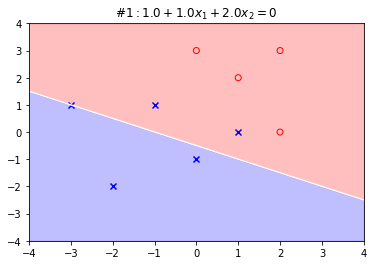

In [4]:
# 更新該 PLA 模型
prepared.update()

# 繪製該 PLA 模型
prepared.plot()

# 執行多次觀察 PLA 模型迭代的過程，收斂後可以執行上面程式區段執行重置模型

# 動手做

完成下面程式區段的 `pla()`，並用其取代 `prepared.demo()`。注意由上往下尋找預測錯誤的資料，更新之後從下一筆繼續尋找，答案才會跟 `prepared.demo()` 完全一致。

In [61]:
def gen_data(file_name):
    my_data = np.genfromtxt(file_name, delimiter=' ')
    
    data= []
    for line in my_data:
        point = (line[0], line[1], line[2], line[3])
        label = line[-1]
        data.append((point, label))
        
    return data

In [62]:
def sign(wx):
    if wx > 0:
        return 1 
    elif wx == 0:
        return 0
    else:
        return -1

def sigma_dot(a, b):
    if len(a) != len(b):
        return 0
    ab = 0
    for i in range(len(a)):
        ab += a[i] * b[i]
    return ab

def h_function(w, x):
    return sign(sigma_dot(w, x))

def update_w(w, x, y):
    for i in range(len(w)):
        w[i] += y * x[i]
        
    return w


In [97]:
def pla(data):
    
    
    dataset = [((1,) + x   , y) for x, y in data]
    # dataset =[((x4, x3, x2, x1, x0), y),
    # .         ((x4, x3, x2, x1, x0), y),
    # .         ((x4, x3, x2, x1, x0), y),
    # .         ((x4, x3, x2, x1, x0), y)]
    
    w = list(dataset[0][0])
    
    while True:
        no_error = True
        for point in dataset:
            xn = point[0]
            yn = point[1]
            if h_function(w, xn) != yn and yn != 0:
                w = update_w(w, xn, yn)
                no_error = False
                # what if w == [0.0, 0.0, 0]:
                
        if no_error :
            break

    return w


In [108]:
if __name__ == '__main__':
    data = gen_data('./pla.dat')
    print('my answer:')
    pla(data)
    print('TA answer:')
    prepared.demo()

my answer:
[-3.0, 3.0841435999999995, -1.5830809999999997, 2.391305, 4.5287635000000002]
TA answer:
#45 [-3.          3.08414355 -1.58308104  2.39130508  4.52876345]
